# Test Environment

In [57]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
#import Models.models as models
#import Models.LSTM.models_LSTM as models
import myLibrary as mL
#from Experiment_Class import Experiment
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import os

NDBC = mL.NDBC_lib
ERA5 = mL.ERA5_lib
Models = mL.Models
DP = mL.DataProcessor
Experiment = mL.Experiment

# Get Data

In [58]:
data_directory = os.path.join(os.getcwd(), f'data/datasets/type_B')

def build_UI():

    # Select Model-------------------------------------------------------------------------------
    global datafile_widget
    datafile_list = os.listdir(data_directory)
    datafile_widget = widgets.Select(
        options=datafile_list,
        value=datafile_list[0],
        # rows=10,
        description='Datafile:',
        disabled=False
    )
    display(datafile_widget)

    #STATIONARY_SHIFT -----------------------------------------------------------------------
    global stationaryShift_widget
    stationaryShift_widget = widgets.BoundedIntText(
        value=1,
        min=0,
        max=10,
        step=1,
        description='',
        disabled=False,
    )
    print("Stationary Shilft: ")
    display(stationaryShift_widget)


    # Select Model-------------------------------------------------------------------------------
    global models_widget
    models_list = list(Models.model_dictionary.keys())
    models_widget = widgets.Select(
        options=models_list,
        value=models_list[0],
        # rows=10,
        description='Model:',
        disabled=False
    )
    display(models_widget)

    #ALPHA:-------------------------------------------------------------------------------
    # create a FloatSlider widget for a value between 0 and 1
    print("Alpha (only for PINN):")
    global alpha_slider
    alpha_slider = widgets.FloatSlider(
        value=0.5,
        min=0,
        max=1,
        step=0.01,
        description='',
        readout_format='.2f',
        orientation='horizontal',
        layout={'width': '500px'}
    )

    # display the FloatSlider widget
    display(alpha_slider)


build_UI()

Select(description='Datafile:', options=('NEW_ORLEANS_STATION_B.pickle', '41117_example_1_A.pickle'), value='N…

Stationary Shilft: 


BoundedIntText(value=1, max=10)

Select(description='Model:', options=('lstm_0', 'lstm_1', 'lstm_2', 'pinn_0', 'pinn_1'), value='lstm_0')

Alpha (only for PINN):


FloatSlider(value=0.5, layout=Layout(width='500px'), max=1.0, step=0.01)

In [59]:
DATAFILE = datafile_widget.value
STATIONARY_SHIFT = stationaryShift_widget.value
MODEL_NAME = models_widget.value
ALPHA = alpha_slider.value

## Optional: use hardcoded variables instead

In [60]:
# DATAFILE = "datafile_1_A.csv"
# STATIONARY_SHIFT = 1
# MODEL_NAME = "pinn_1"
# ALPHA = 0.5

In [61]:
print(f"Datafile: {DATAFILE}")
print(f"Stationary Shift: {STATIONARY_SHIFT}")
print(f"Model: {MODEL_NAME}")
print(f"Alpha: {ALPHA}")

Datafile: NEW_ORLEANS_STATION_B.pickle
Stationary Shift: 1
Model: lstm_2
Alpha: 0.5


In [62]:
with open(f'data/datasets/type_B/{DATAFILE}', 'rb') as f:
    # load the object from the file using pickle.load()
    dataset = pickle.load(f)

print("files:", dataset["files"])
print("nan_threshold", dataset["nan_threshold"])
print("features", dataset["features"])
print("add_era5", dataset["add_era5"])
print("num_test_hours", dataset["num_test_hours"])

train = dataset["data_train"]
test = dataset["data_test"]

display(train)
display(test)

files: [['NWCL1', '2013'], ['NWCL1', '2014'], ['NWCL1', '2015'], ['NWCL1', '2016'], ['NWCL1', '2017'], ['NWCL1', '2018'], ['NWCL1', '2019'], ['NWCL1', '2020'], ['NWCL1', '2021'], ['NWCL1', '2022']]
nan_threshold 0.33
features ['PRES', 'WTMP', 'WSPD', 'ATMP', 'WDIR']
add_era5 True
num_test_hours 24


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),PRES_ERA5(t-1),ATMP_ERA5(t-1),WTMP_ERA5(t-1),WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),WDIR_ERA5(t),WSPD_ERA5(t),PRES_ERA5(t),ATMP_ERA5(t),WTMP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,
2013-01-01 01:00:00,77.0,0.5,1020.3,14.4,14.3,160.344694,3.637294,1020.932075,15.557013,-33040.15,69.0,0.5,1020.1,14.0,14.3,152.860879,4.078028,1020.442925,15.317984,-33040.15
2013-01-01 02:00:00,69.0,0.5,1020.1,14.0,14.3,152.860879,4.078028,1020.442925,15.317984,-33040.15,150.0,0.7,1019.6,13.9,14.4,146.328155,4.506739,1020.034422,15.277824,-33040.15
2013-01-01 03:00:00,150.0,0.7,1019.6,13.9,14.4,146.328155,4.506739,1020.034422,15.277824,-33040.15,145.0,1.0,1018.8,13.9,14.4,137.676518,4.560669,1019.651220,15.437498,-33040.15
2013-01-01 04:00:00,145.0,1.0,1018.8,13.9,14.4,137.676518,4.560669,1019.651220,15.437498,-33040.15,136.0,1.7,1018.3,15.4,14.2,130.079821,5.018740,1019.444596,15.729268,-33040.15
2013-01-01 05:00:00,136.0,1.7,1018.3,15.4,14.2,130.079821,5.018740,1019.444596,15.729268,-33040.15,136.0,1.7,1018.1,16.2,14.1,122.159155,5.183811,1018.759892,15.858459,-33040.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 22:00:00,299.0,3.4,1030.0,-0.7,19.0,303.172779,7.353588,1030.637428,1.297044,-33040.15,345.0,6.4,1030.1,-0.2,23.2,298.421785,7.038757,1030.794555,0.323549,-33040.15
2022-12-23 23:00:00,345.0,6.4,1030.1,-0.2,23.2,298.421785,7.038757,1030.794555,0.323549,-33040.15,328.0,3.8,1030.4,0.1,24.0,296.482910,6.887680,1031.042599,-0.144467,-33040.15
2022-12-24 00:00:00,328.0,3.8,1030.4,0.1,24.0,296.482910,6.887680,1031.042599,-0.144467,-33040.15,340.0,6.3,1030.8,-0.2,19.4,294.462406,7.161923,1031.620216,-0.610176,-33040.15


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),WSPD_ERA5(t-1),WDIR_ERA5(t-1),WTMP_ERA5(t-1),ATMP_ERA5(t-1),PRES_ERA5(t-1),WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),WSPD_ERA5(t),WDIR_ERA5(t),WTMP_ERA5(t),ATMP_ERA5(t),PRES_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,116.0,1.0,1020.3,15.4,11.9,2.285816,163.890526,-33040.15,14.253348,1020.473159,141.0,1.0,1020.4,14.4,12.0,3.029134,163.972838,-33040.15,14.001571,1020.381706
2017-12-31 01:00:00,141.0,1.0,1020.4,14.4,12.0,3.029134,163.972838,-33040.15,14.001571,1020.381706,86.0,1.6,1020.7,13.4,12.0,3.190396,169.248409,-33040.15,13.806919,1020.746141
2017-12-31 02:00:00,86.0,1.6,1020.7,13.4,12.0,3.190396,169.248409,-33040.15,13.806919,1020.746141,78.0,1.4,1020.9,13.3,12.1,3.125989,168.729895,-33040.15,13.596399,1020.961363
2017-12-31 03:00:00,78.0,1.4,1020.9,13.3,12.1,3.125989,168.729895,-33040.15,13.596399,1020.961363,78.0,2.1,1020.9,13.1,12.1,3.191014,174.122670,-33040.15,13.322406,1021.155957
2017-12-31 04:00:00,78.0,2.1,1020.9,13.1,12.1,3.191014,174.122670,-33040.15,13.322406,1021.155957,58.0,1.7,1020.9,12.6,12.1,3.461191,184.983313,-33040.15,13.349911,1020.985429
2017-12-31 05:00:00,58.0,1.7,1020.9,12.6,12.1,3.461191,184.983313,-33040.15,13.349911,1020.985429,47.0,5.3,1020.6,11.5,12.1,3.942978,193.717855,-33040.15,13.339332,1020.367954
2017-12-31 06:00:00,47.0,5.3,1020.6,11.5,12.1,3.942978,193.717855,-33040.15,13.339332,1020.367954,74.0,2.3,1019.5,11.3,12.1,4.139444,197.709774,-33040.15,13.400690,1019.826804
2017-12-31 07:00:00,74.0,2.3,1019.5,11.3,12.1,4.139444,197.709774,-33040.15,13.400690,1019.826804,64.0,5.8,1019.4,11.4,12.1,4.372039,203.620881,-33040.15,13.159491,1019.205891
2017-12-31 08:00:00,64.0,5.8,1019.4,11.4,12.1,4.372039,203.620881,-33040.15,13.159491,1019.205891,70.0,6.0,1019.1,11.0,12.2,4.476132,210.980678,-33040.15,13.078033,1019.086934


# Data Processing

## 1. Make data stationary

In [63]:
STATIONARY = True #Set Flag for report
train_stationary = DP.data_to_stationary(train, n = STATIONARY_SHIFT)
test_stationary = DP.data_to_stationary(test, n = STATIONARY_SHIFT)

print(f"TRAIN: shape: {train_stationary.shape}")
display(train_stationary.head())

print(f"TEST: shape: {test_stationary.shape}")
display(test_stationary.head())

TRAIN: shape: (72593, 20)


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),PRES_ERA5(t-1),ATMP_ERA5(t-1),WTMP_ERA5(t-1),WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),WDIR_ERA5(t),WSPD_ERA5(t),PRES_ERA5(t),ATMP_ERA5(t),WTMP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,
2013-01-01 02:00:00,-8.0,0.0,-0.2,-0.4,0.0,-7.483816,0.440734,-0.489150,-0.239028,0.0,81.0,0.2,-0.5,-0.1,0.1,-6.532724,0.428711,-0.408503,-0.040161,0.0
2013-01-01 03:00:00,81.0,0.2,-0.5,-0.1,0.1,-6.532724,0.428711,-0.408503,-0.040161,0.0,-5.0,0.3,-0.8,0.0,0.0,-8.651636,0.053930,-0.383202,0.159675,0.0
2013-01-01 04:00:00,-5.0,0.3,-0.8,0.0,0.0,-8.651636,0.053930,-0.383202,0.159675,0.0,-9.0,0.7,-0.5,1.5,-0.2,-7.596698,0.458071,-0.206624,0.291769,0.0
2013-01-01 05:00:00,-9.0,0.7,-0.5,1.5,-0.2,-7.596698,0.458071,-0.206624,0.291769,0.0,0.0,0.0,-0.2,0.8,-0.1,-7.920666,0.165071,-0.684704,0.129191,0.0
2013-01-01 06:00:00,0.0,0.0,-0.2,0.8,-0.1,-7.920666,0.165071,-0.684704,0.129191,0.0,12.0,0.5,-0.9,0.9,0.1,-6.888134,-0.292906,-0.588772,-0.059515,0.0


TEST: shape: (23, 20)


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),WSPD_ERA5(t-1),WDIR_ERA5(t-1),WTMP_ERA5(t-1),ATMP_ERA5(t-1),PRES_ERA5(t-1),WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),WSPD_ERA5(t),WDIR_ERA5(t),WTMP_ERA5(t),ATMP_ERA5(t),PRES_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,
2017-12-31 01:00:00,25.0,0.0,0.1,-1.0,0.1,0.743318,0.082312,0.0,-0.251778,-0.091452,-55.0,0.6,0.3,-1.0,0.0,0.161262,5.275571,0.0,-0.194652,0.364434
2017-12-31 02:00:00,-55.0,0.6,0.3,-1.0,0.0,0.161262,5.275571,0.0,-0.194652,0.364434,-8.0,-0.2,0.2,-0.1,0.1,-0.064406,-0.518514,0.0,-0.210520,0.215222
2017-12-31 03:00:00,-8.0,-0.2,0.2,-0.1,0.1,-0.064406,-0.518514,0.0,-0.210520,0.215222,0.0,0.7,0.0,-0.2,0.0,0.065024,5.392775,0.0,-0.273993,0.194594
2017-12-31 04:00:00,0.0,0.7,0.0,-0.2,0.0,0.065024,5.392775,0.0,-0.273993,0.194594,-20.0,-0.4,0.0,-0.5,0.0,0.270177,10.860643,0.0,0.027505,-0.170528
2017-12-31 05:00:00,-20.0,-0.4,0.0,-0.5,0.0,0.270177,10.860643,0.0,0.027505,-0.170528,-11.0,3.6,-0.3,-1.1,0.0,0.481787,8.734542,0.0,-0.010579,-0.617475


## 2. Transform to supervised problem

In [64]:
#Is already supervised!

## train test split

In [65]:
train_X, train_y, _, _ = DP.train_test_split(train_stationary, -len(train_stationary))
_, _, test_X, test_y = DP.train_test_split(test_stationary, len(test_stationary))
print("Shapes: ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shapes:  (72593, 1, 10) (72593, 10) (23, 1, 10) (23, 10)


## Normalize the data

In [66]:
# Scale the data
#NORMALIZED = True   #set flag for report
train_X_scaled, train_y_scaled, test_X_scaled, test_y_scaled, SCALER = DP.scale_data(train_X,
                                                                                     train_y,
                                                                                     test_X,
                                                                                     test_y)

---
# Select Model

In [67]:
#model = models.lstm_0(train_X_scaled,train_y_scaled)
model = Models.get_model(MODEL_NAME, train_X, train_y, ALPHA)
model.summary()

Epoch 1/100
1021/1021 [==============================] - 6s 4ms/step - loss: 976.5641 - val_loss: 930.2838
Epoch 2/100
1021/1021 [==============================] - 3s 3ms/step - loss: 963.3956 - val_loss: 922.9772
Epoch 3/100
1021/1021 [==============================] - 3s 3ms/step - loss: 956.9909 - val_loss: 918.7358
Epoch 4/100
1021/1021 [==============================] - 3s 3ms/step - loss: 951.5237 - val_loss: 914.5004
Epoch 5/100
1021/1021 [==============================] - 3s 3ms/step - loss: 946.7280 - val_loss: 912.2341
Epoch 6/100
1021/1021 [==============================] - 3s 3ms/step - loss: 943.2355 - val_loss: 910.0530
Epoch 7/100
1021/1021 [==============================] - 3s 3ms/step - loss: 940.4144 - val_loss: 906.9854
Epoch 8/100
1021/1021 [==============================] - 3s 3ms/step - loss: 938.1710 - val_loss: 905.5870
Epoch 9/100
1021/1021 [==============================] - 3s 3ms/step - loss: 935.4269 - val_loss: 902.1477
Epoch 10/100
1021/1021 [=============

----
# One-Shot Forecasting

In [68]:
_ = model.predict(train_X_scaled, batch_size=1)

72593/72593 [==============================] - 70s 949us/step


In [69]:
output_cols  = test.loc[:, ~test.columns.str.contains('t-')].columns
#output_cols

In [70]:
yhat = model.predict(test_X_scaled)
#yhat

1/1 [==============================] - 1s 515ms/step


In [71]:
yhat_unscaled = DP.invert_scaling(yhat, SCALER)
#yhat_unscaled

In [72]:
yhat_unscaled_df = pd.DataFrame(yhat_unscaled)
yhat_unscaled_df.columns = [name + "_pred" for name in output_cols]
yhat_unscaled_df.set_index(test.tail(len(yhat)).index, inplace=True)
#yhat_unscaled_df

In [73]:
evaluation_1 = test.loc[:, ~test.columns.str.contains('t-')]    #ground truth: just y, without X
#evaluation_1

In [74]:
for col in evaluation_1.columns:
    shifted = evaluation_1[col].shift(STATIONARY_SHIFT)
    evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]

/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_49505/795191291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]
/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_49505/795191291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]
/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_49505/795191291.py:3: SettingWithCopyWarning: 
A value is

In [75]:
evaluation_1 = evaluation_1.iloc[STATIONARY_SHIFT:]  # remove first n entries since there is no delta value for them
evaluation_1

,WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),WSPD_ERA5(t),WDIR_ERA5(t),WTMP_ERA5(t),ATMP_ERA5(t),PRES_ERA5(t),WDIR(t)_pred,WSPD(t)_pred,PRES(t)_pred,ATMP(t)_pred,WTMP(t)_pred,WSPD_ERA5(t)_pred,WDIR_ERA5(t)_pred,WTMP_ERA5(t)_pred,ATMP_ERA5(t)_pred,PRES_ERA5(t)_pred
timestamp,,,,,,,,,,,,,,,,,,,,
2017-12-31 01:00:00,86.0,1.6,1020.7,13.4,12.0,3.190396,169.248409,-33040.15,13.806919,1020.746141,-454.096375,0.615812,1015.628458,13.216334,11.639461,-431.097544,164.119216,-33044.326644,13.163839,1020.881703
2017-12-31 02:00:00,78.0,1.4,1020.9,13.3,12.1,3.125989,168.729895,-33040.15,13.596399,1020.961363,-1766.007812,0.882802,1015.639286,12.279377,11.755449,-709.513156,169.437793,-33044.591697,12.977677,1021.246137
2017-12-31 03:00:00,78.0,2.1,1020.9,13.1,12.1,3.191014,174.122670,-33040.15,13.322406,1021.155957,-483.064819,1.025721,1016.129477,12.137250,11.742239,-409.628527,168.877520,-33044.325768,12.777526,1021.461359
2017-12-31 04:00:00,58.0,1.7,1020.9,12.6,12.1,3.461191,184.983313,-33040.15,13.349911,1020.985429,-1618.249512,1.365223,1015.805747,11.990058,11.863381,-625.503200,174.307451,-33044.626513,12.495410,1021.655954
2017-12-31 05:00:00,47.0,5.3,1020.6,11.5,12.1,3.942978,193.717855,-33040.15,13.339332,1020.367954,4273.465820,1.686572,1015.217903,12.617175,12.018363,-387.422598,185.267751,-33045.330417,13.327280,1021.485420
2017-12-31 06:00:00,74.0,2.3,1019.5,11.3,12.1,4.139444,197.709774,-33040.15,13.400690,1019.826804,1590.291626,4.848643,1015.199562,10.927983,11.924720,-434.550308,193.959461,-33045.006714,12.861210,1020.867948
2017-12-31 07:00:00,64.0,5.8,1019.4,11.4,12.1,4.372039,203.620881,-33040.15,13.159491,1019.205891,-960.725586,1.634256,1014.475667,10.138921,11.809731,-524.827535,197.870518,-33044.567624,12.520719,1020.326800
2017-12-31 08:00:00,70.0,6.0,1019.1,11.0,12.2,4.476132,210.980678,-33040.15,13.078033,1019.086934,-2182.314697,5.019571,1014.325738,10.223342,11.873903,-565.313874,203.795884,-33044.590284,12.290279,1019.705888
2017-12-31 09:00:00,67.0,5.6,1019.0,11.0,12.2,4.673242,216.828288,-33040.15,12.754319,1019.090372,221.845901,5.398720,1013.807788,10.208611,12.001715,-542.681034,211.199674,-33044.866181,12.459054,1019.586929


In [76]:
wtmp_true = [col for col in evaluation_1.columns if col.startswith("WTMP")][0]

mae = mean_absolute_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
mse = mean_squared_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
print('MAE: ', mae)
print('MSE: ', mse)

MAE:  0.25511203963694207
MSE:  0.07528804254939128


<AxesSubplot:xlabel='timestamp'>

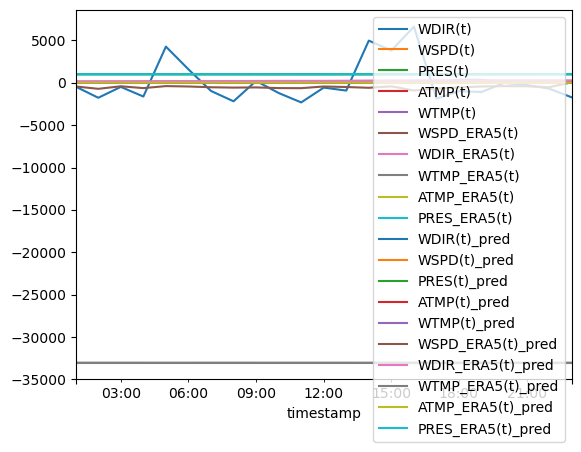

In [77]:
evaluation_1.plot(kind='line')

---
# SAVE

In [54]:
# create a text input widget for username
filename_widget = widgets.Text(
    value='',
    placeholder='Enter filename',
    description='Filename:',
    disabled=False
)
# add '.csv' to the description
extension_label = widgets.Label('.pickle')

# display the widget
display(widgets.HBox([filename_widget, extension_label]))

print("Please also check if the reports description needs to be changed!")

Please also check if the reports description needs to be changed!


In [55]:
report_description="First test with approach B, excl. recurrent forecasting"

In [56]:
filename = filename_widget.value

filename = "report_B_0"


if filename == "":
    print("Enter a valid filename!")

else:
    #Save Data About executed Test:

    #Convert model summary to string
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    model_summary = "\n".join(stringlist)

    report = Experiment(
        name=filename,
        description=report_description,

        stations = dataset["files"],
        years = ["not available"],
        nan_threshold=dataset["nan_threshold"],
        features=dataset["features"],
        era5=dataset["add_era5"],

        stationary_shift=STATIONARY_SHIFT,
        lag=1,
        n_test_hours=dataset["num_test_hours"],

        #stationary=STATIONARY,
        scaler=SCALER,

        model_name = MODEL_NAME,
        model_summary=model_summary,

        one_shot_forecast = evaluation_1,
        recursive_forecast = pd.DataFrame()
    )


    # open a file for writing in binary mode
    filepath = f'data/reports/{filename}.pickle'
    with open(filepath, 'wb') as f:
        # write the object to the file using pickle.dump()
        pickle.dump(report, f)
        print("File successfully saved:")
        print(filepath)

IndexError: list index out of range